# Natural Computing

## Assignment 2: Swarm Intelligence

## Exercise 3

*Source paper*

Van der Merwe, D. W., and Andries Petrus Engelbrecht.  "Data clustering using particleswarm optimization". Evolutionary Computation, 2003.  CEC’03.  The 2003 Congresson. Vol. 1. IEEE, 2003.

In [1]:
# Imports
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Load Iris dataset
Features X:

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm 

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
print('X shape:', X.shape) # 150 records, 4 features
print('Classes:', np.unique(y)) # 3 classes

X shape: (150, 4)
Classes: [0 1 2]


In [3]:
def plot_iris(X, y, title=None):
    # stack features and classes
    data = np.hstack((X, np.expand_dims(y, axis=1)))
    # convert numpy array to pandas dataframe
    iris_pd = pd.DataFrame(data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])
    iris_pd['class'] = iris_pd['class'].astype(int)
    # plot
    plot_sns = sns.pairplot(iris_pd, hue='class', palette="husl", markers=["o", "s", "D"])
    plot_sns.fig.set_size_inches(8, 8)
    plot_sns.fig.suptitle(title, size=14, y=1.05)

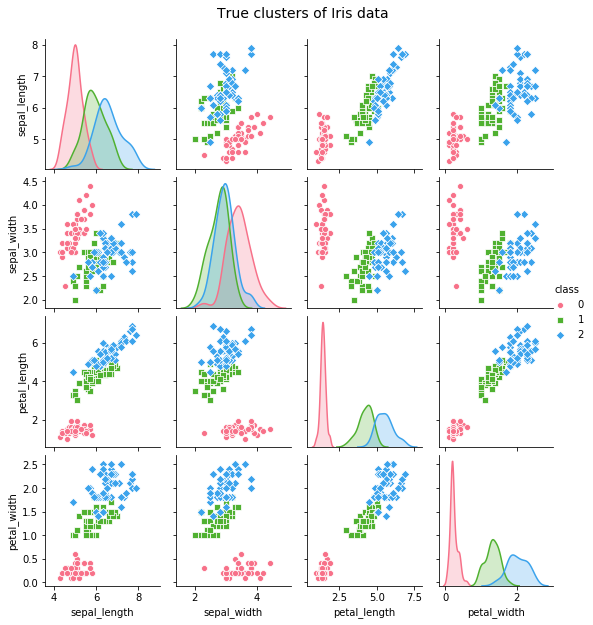

In [4]:
plot_iris(X, y, 'True clusters of Iris data')

#### Artificial dataset 1

In [5]:
def artificial_dataset(N):
    """Artificial dataset 1"""
    X, Y = [], []
    np.random.seed(42)
    for _ in range(N):
        z1, z2  = np.random.uniform(-1, 1, 2)
        if z1 >= 0.7 or ( z1 <= 0.3 and (z2 >= -0.2-z1) ):
            y = 1
        else:
            y = 0
        X.append([z1, z2])
        Y.append(y)
    return np.asarray(X), np.asarray(Y)

In [6]:
# N=400 data vectors in the paper
X_AD, y_AD = artificial_dataset(400)
X_AD.shape

(400, 2)

In [7]:
def plot_artificial(X, y, title=None, centers=None):
    plt.figure(figsize=(7, 7))
    idx0 = np.where(y == 0)[0]
    idx1 = np.where(y == 1)[0]
    plt.scatter(X[idx0, 0], X[idx0, 1], c='tab:red', marker='+', label='class 0')
    plt.scatter(X[idx1, 0], X[idx1, 1], c='tab:blue', marker='x', label='class 1')
    if centers is not None:
        plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)    
    plt.xlabel('$z1$')
    plt.ylabel('$z2$')
    plt.title(title, size=14)
    plt.legend()
    plt.show()

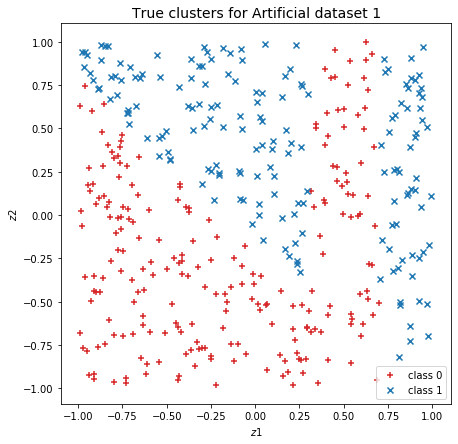

In [8]:
plot_artificial(X_AD, y_AD, 'True clusters for Artificial dataset 1')

### PSO clustering algorithm

Quality is measured according to the following three criteria (according to the paper):
- the quantization error
- the intra-cluster distances, i.e. the distance between data vectors within a cluster, where the objective is to minimize the intra-cluster distances
- the inter-clus!er distances, i.e. the distance between the centroids of the clusters, where the objective is to maximize the distance between clusters

#### Parameters

In [ ]:
# In accordance with the paper:
n_simulations = 30 # number of simulations
n_evals = 1000 # number of function evaluations
particles = 10 # number of particles
omega  = 0.72 # inertia weight
c1 = 1.49 # local best weight
c2 = 1.49 # global best weight

### k-means clustering algorithm

In [9]:
n_clusters = 3
k_means = KMeans(n_clusters = n_clusters, n_init = 50)
k_means.fit(X)

y_kmeans = k_means.predict(X)
centers = k_means.cluster_centers_

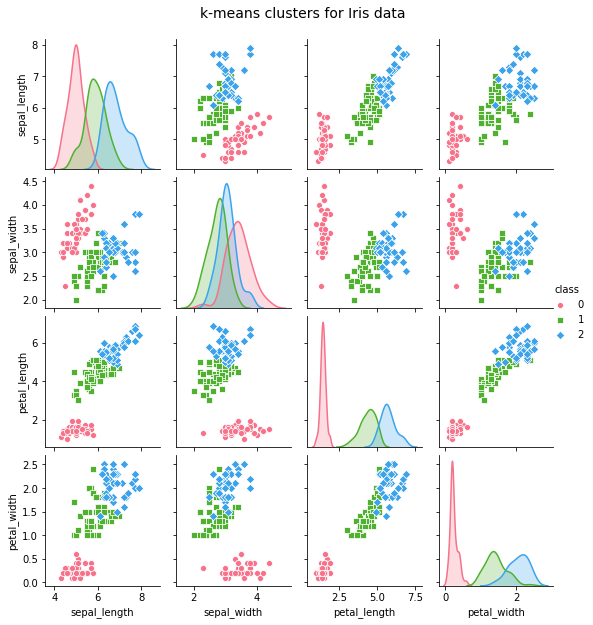

In [10]:
plot_iris(X, y_kmeans, 'k-means clusters for Iris data')

In [25]:
n_clusters_AD = 2
k_means = KMeans(n_clusters = n_clusters_AD, n_init = 50)
k_means.fit(X_AD)

y_kmeans_AD = k_means.predict(X_AD)
centers_AD = k_means.cluster_centers_

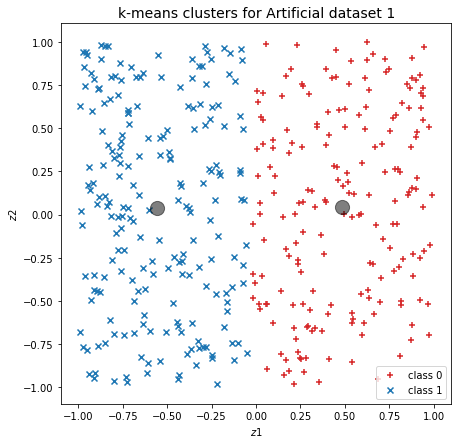

In [24]:
plot_artificial(X_AD, y_kmeans_AD, 'k-means clusters for Artificial dataset 1', centers=centers_AD)